# EK381 Exploratory Data Analysis <br> Lab 9: Estimation and Regression

### This lab was completed by Rawisara Chairat.

In this lab, we will learn how to fit a line to data as well as evaluate the performance of the resulting linear predictor. We will also see that the same ideas can be used to fit higher-order functions, such as quadratic functions. To get started, let us assume that we have collected data points of the form $(X_1,Y_1),\ldots,(X_n,Y_n)$. Our goal is to fit a linear function of the form $$\hat{Y} = a X + b$$ so that, given a new data point $X$, we can try to predict the corresponding value of $Y$ using $\hat{Y}$. 

**Note that, in the videos and lecture notes, we have instead assumed that we will have access to an observation $Y$ that we will use to predict $X$. However, this is a bit harder to visualize on a standard plot so we have decided to use $X$ to predict $Y$.** Moreover, the statistics and machine learning convention is to use $Y$ for the estimation target and $X$ for the available features.

We will focus on finding a linear estimator that minimizes the mean-squared error (MSE) $$\mathrm{MSE} = \mathbb{E}[(Y - \hat{Y})^2]\ .$$ To estimate the MSE from data, we can simply plug in our available data points: $$\mathrm{MSE} = \frac{1}{n} \sum_{i=1}^n (Y_i - (a X_i + b))^2$$ 

In Video 7.2, we learned that the **linear least-squares error (LLSE) estimator** attains the smallest possible MSE across all linear functions. For estimating $Y$ from $X$, it takes the form $$\hat{Y}_{\text{LLSE}} = \mathbb{E}[Y] + \frac{\mathrm{Cov}[X,Y]}{\mathrm{Var}[X]} (X - \mathbb{E}[X])\ . $$ This is more commonly referred to as **linear regression** in statistics (which also presumes the means, variances, and covariances are fit from the training data).

In [1]:
#!pip install sklearn

In [2]:
#numpy is a package for working with arrays, linear algebra, etc. and stands for "numerical Python".
import numpy as np
#pandas is a package for working with data frames.
import pandas as pd
#matplotlib is a plotting library that mimics Matlab conventions.
import matplotlib.pyplot as plt
#seaborn is a data visualization package.
import seaborn as sns
#scipy.stats is a statistics library
import scipy.stats as st
#sklearn is a machine learning library. (If you do not have it installed, uncomment the install cell above and run it.)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Let's start with a very simple scenario: we are given only two data points and asked to select the slope and offset for a line that passes through both data points. The first lab problem below has you do this by trial-and-error as well as by the LLSE estimator.

In [3]:
data1 = {
    'X': [1,3],
    'Y': [1.5,2.5]
}
df1 = pd.DataFrame(data1)
df1

,X,Y
0,1,1.5
1,3,2.5


Text(0, 0.5, 'y')

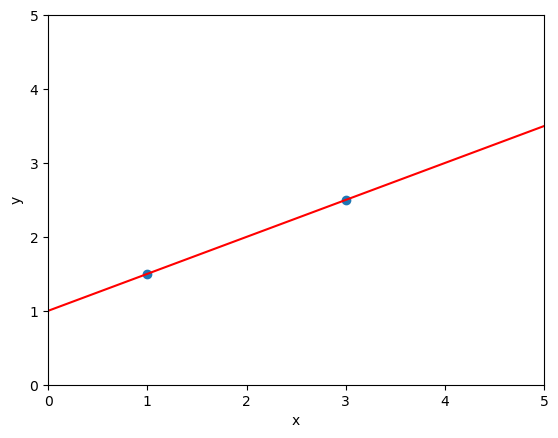

In [11]:
#Scatter plot X and Y data
plt.scatter(df1["X"],df1["Y"])

#Choose your values for slope and offset here
slope = 0.5
offset = 1

#Plot resulting line in red
xpoints = np.linspace(0,5,100)
ypoints = slope*xpoints + offset
plt.plot(xpoints,ypoints,color="red")
plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel('x')
plt.ylabel('y')

In [8]:
df1.mean()

X    2.0
Y    2.0
dtype: float64

In [9]:
df1.cov()

,X,Y
X,2.0,1.0
Y,1.0,0.5


---
####  L9.1 Fitting a line to two data points:

#### (a) Using the code above, determine (via trial-and-error) the slope and offset of the line that passes through the two data points.
#### slope = 0.5
#### offset = 1

#### (b) We know that the best linear estimator of $Y$ from $X = x$ is $$\mathbb{E}[Y] + \frac{\mathrm{Cov}[X,Y]}{\mathrm{Var}[X]} (x - \mathbb{E}[X])$$ Using `df1.mean()` and `df1.cov()`, you can determine all of these values for the dataset `df1`. Do so and confirm that the resulting slope and offset match what you found in part (a).

#### E[X] = 2
#### E[Y] = 2
#### Var[X] = 2
#### Cov[X,Y] = 1
#### slope = Cov[X,Y] / Var[X] = 1/2 = 0.5
#### offset = E[Y] - (Cov[X,Y] * E[X]) / Var[X] = 2 - (1 * 2)/2 = 1

#### Comment: The result calculated from part (b) matched with what I found in part (a).
---

In [12]:
display(df1.mean())
display(df1.cov())

X    2.0
Y    2.0
dtype: float64

,X,Y
X,2.0,1.0
Y,1.0,0.5


Now, let's consider a scenario with more than two data points that do not all lie on the same line. We need to select a single slope and offset that tries to fit all points as best as possible. As mentioned above, we will use the mean-squared error (MSE) as our criterion for determining which line fits best. The second lab problem has you fit this line via trial-and-error as well as via the LLSE estimator.

The mean-squared error is 0.16875000000000004


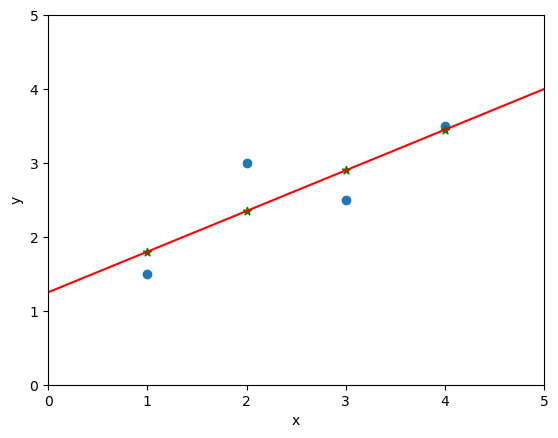

In [58]:
data2 = {
    'X': [1,2,3,4],
    'Y': [1.5,3,2.5,3.5]
}
df2 = pd.DataFrame(data2)
plt.scatter(df2["X"],df2["Y"]) 

#Try different values for the slope and offset here
slope = 0.55
offset = 1.25

#Plot the resulting line in red
xpoints = np.linspace(0,5,100)
ypoints = slope*xpoints + offset
plt.plot(xpoints,ypoints,color="red")
plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel('x')
plt.ylabel('y')

#Create linear prediction of Y from X
df2["Ypredict"] = slope*df2["X"] + offset

#Plot predicted Y points for current X points as green stars. 
plt.scatter(df2["X"],df2["Ypredict"],color="green",marker="*")

#Calculate and output mean-squared error (MSE).
MSE = ((df2["Y"] - df2["Ypredict"])**2).mean()
print("The mean-squared error is " + str(MSE))

In [14]:
display(df2.mean())
display(df2.cov())

X           2.500
Y           2.625
Ypredict    2.500
dtype: float64

,X,Y,Ypredict
X,1.666667,0.916667,1.666667
Y,0.916667,0.729167,0.916667
Ypredict,1.666667,0.916667,1.666667


---
####  L9.2 Fitting a line to more than two data points:

#### (a) Using the code above, determine (via trial-and-error) a slope and offset that seem to fit the data reasonably well. Your choices do not need to be carefully optimized, they should just yield a good visual fit. Write down your choices of slope and offset below as well as the resulting mean-squared error (MSE).
#### slope = 0.6
#### offset = 1.3
#### MSE = 0.2025

#### (b) We know that the best linear estimator of $Y$ from $X = x$ is $$\mathbb{E}[Y] + \frac{\mathrm{Cov}[X,Y]}{\mathrm{Var}[X]} (x - \mathbb{E}[X])$$ Using `df2.mean()` and `df2.cov()`, you can determine all of these values for the dataset `df2`. Do so, write down the resulting values for the slope and offset below. Then, run the code with these values to determine the MSE and write it down below. Comment on whether the MSE is lower than what you got in part (a). (This should be the case since the MSE should be minimized by the best linear estimator.)

#### slope = Cov[X,Y] / Var[X] = 0.916667/1.666667 = 0.55
#### offset = E[Y] - (Cov[X,Y] * E[X]) / Var[X] = 2.625 - (0.916667*2.5)/1.666667 = 1.25
#### MSE = 0.16875
#### Comment: The MSE I got from this part is lower than the one I got in part (a).

---

Now, let's consider a scenario where we believe that a quadratic function of the form $$\hat{Y} = a X^2 + b$$ will be a better fit to the data than a simple linear fit $$\hat{Y} = a X + b \ . $$ We can again use the LLSE estimator to determine the coefficients, but we will act as if $X^2$ is the available data, rather than $X$, resulting in the linear estimator $$\hat{Y} = \mathbb{E}[Y] + \frac{\mathrm{Cov}[X^2,Y]}{\mathrm{Var}[X^2]} (X^2 - \mathbb{E}[X^2]) \ . $$ The lab problem below has you determine the coefficients via trial-and-error as well as via the LLSE estimator.

The mean-squared error is 0.0


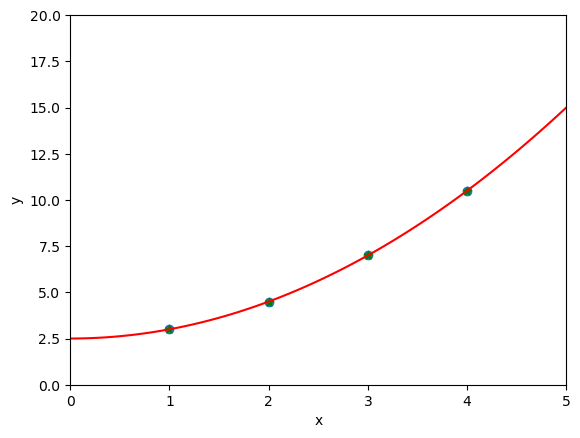

In [24]:
data3 = {
    'X': [1,2,3,4],
    'Y': [3,4.5,7,10.5]
}
df3 = pd.DataFrame(data3)
plt.scatter(df3["X"],df3["Y"]) 

#Try different values for a and b
a = 0.5
b = 2.5

#Plot the resulting curve in red
xpoints = np.linspace(0,5,100)
ypoints = a*(xpoints**2) + b
plt.plot(xpoints,ypoints,color="red")
plt.xlim(0,5)
plt.ylim(0,20)
plt.xlabel('x')
plt.ylabel('y')

#Create linear prediction of Y from X squared (in Python this is X**2)
df3["Y Quadratic Fit"] = a*(df3["X"]**2) + b

#Plot predicted Y points for current X points as green stars. 
plt.scatter(df3["X"],df3["Y Quadratic Fit"],color="green",marker="*")

#Calculate and output mean-squared error (MSE).
MSE = ((df3["Y"] - df3["Y Quadratic Fit"])**2).mean()
print("The mean-squared error is " + str(MSE))

In [27]:
df3["Xsquared"] = df3["X"]**2
display(df3.mean())
display(df3.cov())

X                  2.50
Y                  6.25
Y Quadratic Fit    6.25
Xsquared           7.50
dtype: float64

,X,Y,Y Quadratic Fit,Xsquared
X,1.666667,4.166667,4.166667,8.333333
Y,4.166667,10.750000,10.750000,21.500000
Y Quadratic Fit,4.166667,10.750000,10.750000,21.500000
Xsquared,8.333333,21.500000,21.500000,43.000000


---
####  L9.3 Fitting a curve to data:

#### (a) Using the code above, determine (via trial-and-error) values `a` and `b` that so that the curve $a X^2 + b$ fits the data $Y$ perfectly. (The MSE should be 0.) Write down your choices below:
#### a = 0.5
#### b = 2.5

#### (b) Another way to find these coefficients is to fit a linear estimator from $X^2$ to $Y$. Specifically, create a new column `df3["Xsquared"] = df3["X"]**2` that contains the squared values of X. Then use `mean()` and `cov()` to determine the mean vector and covariance matrix. These will in turn allow you to determine the best quadratic fit:
#### $$\mathbb{E}[Y] + \frac{\mathrm{Cov}[X^2,Y]}{\mathrm{Var}[X^2]} (x^2 - \mathbb{E}[X^2])$$ Do so, write down the resulting values below, and confirm that these are the same as what you found in part (a).

#### E[Xsquared] = 7.5
#### E[Y] = 6.25
#### Var[Xsquared] = 43 
#### Cov[Xsquared,Y] = 21.5
#### a = Cov[Xsquared,Y] / Var[Xsquared] = 21.5/43 = 0.5
#### b = E[Y] - (Cov[Xsquared,Y] * E[Xsquared]) / Var[Xsquared] = 6.25 - (21.5*7.5)/43 = 2.5
#### Comment: The result I got from this part is the same as the result I got in part (a).
---

Now, let's apply linear regression to a real dataset. Specifically, we will use the Concrete Compressive Strength Data Set created by I.-C. Yeh (initially for the paper Yeh, I-Cheng, ”Modeling of strength of high performance concrete using artificial neural networks,” Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).) and hosted by the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength). Watch [this one-minute video](https://www.youtube.com/watch?v=AR_fjmV2Mpk
) to see a demonstration of how concrete compressive strength is tested. The dataset consists of 1030 concrete samples, each with data for the following 9 columns:

0. Cement (kg/m3),
1. Fly ash (kg/m3),
2. Blast furnace slag (kg/m3),
3. Water (kg/m3),
4. Superplasticizer (kg/m3),
5. Coarse aggregate (kg/m3),
6. Fine aggregate (kg/m3),
7. Age at test time (days),
8. Compressive strength (in MPa).

Our goal is to learn how to predict the compressive strength in the last column using the data from the other columns. Let's start by loading the dataset as a dataframe.

In [28]:
concrete_df = pd.read_csv("datasets/concretedata.csv")
concrete_df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


How can we quickly visualize the linear relationships between the columns? Let's start by visualizing the covariance matrix. The code below uses the seaborn built-in plotting function `sns.heatmap` helps us highlight larger values via color.

Text(0.5, 1.0, 'Covariance Matrix')

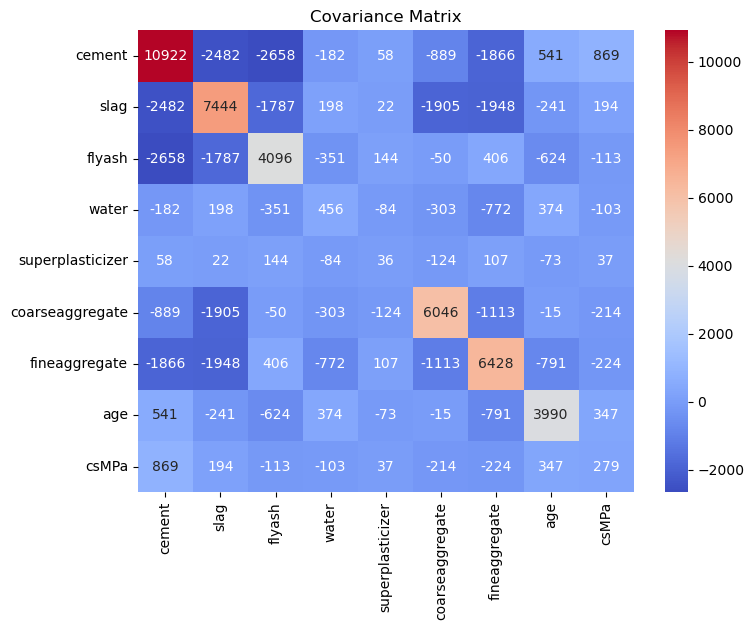

In [29]:
Sigma_concrete = concrete_df.cov()

# Display the covariance matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Sigma_concrete, annot=True, fmt=".0f", cmap="coolwarm", cbar=True)
plt.title("Covariance Matrix")

Of course, the covariance alone does not tells us the quality of a feature as a linear predictor. Instead, we can use the correlation coefficient. The code below plots the matrix of correlation coefficients between features. Note that the diagonal entries will always be 1, since we can perfectly predict a variable from itself.

Text(0.5, 1.0, 'Correlation Coefficient Matrix')

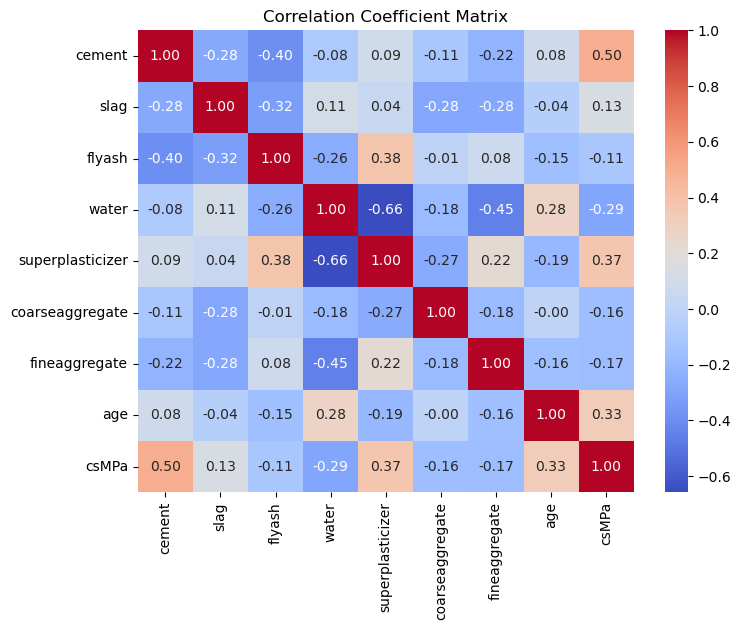

In [30]:
Sigma_correlation = concrete_df.corr()

# Display the covariance matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Sigma_correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Coefficient Matrix")

The $R^2$ score is a standard metric called "R squared" or the **coefficient of determination**. $R^2$ is equal to the squared correlation coefficient $\rho_{Y,\hat{Y}}^2$ between the target $Y$ and the prediction $\hat{Y}$. This turns out to be equal to the fraction of the variance of the target $Y$ that is explained by the prediction $\hat{Y}$. Thus, $R^2$ range from $0$ to $1$. At $R^2 = 0$, the prediction $\hat{Y}$ does not explain any of $Y$. At $R^2 = 1$, the prediction $\hat{Y}$ explains $Y$ perfectly. The $R^2$ score is convenient since it is scale-free, whereas the covariance can change if we scale $Y$. In other words, an MSE of $200$ on two different datasets will mean different things, whereas an $R^2$ score of $0.4$ on two different datasets will mean that the linear estimator has exactly the same performance.


---
####  L9.4 Correlation coefficient matrix:

#### Based on the correlation coefficient matrix, which feature do you think will do the best job of predicting the value of `csMPa`? Which feature will do the worst job?
#### Answer: `cement` is the best at predicting the value of `csMPa` while `flyash` is the worst at doing so.
---

Now, let's apply what we learned about to the concrete dataset. The code below uses built-in `sklearn` functions to split the dataset into training and testing datasets, fit a linear regression model (i.e., an LLSE estimator) from the training data, apply this model to the testing data, and evaluate the performance via the MSE and $R^2$. Finally, it creates a scatter plot where each point on the (x,y) plane has its x-value set to the true target value (drawn from one point in the testing data set) and its y-value set to the corresponding predicted target value. Thus, if the prediction is perfect, the scatter plot should lie completely on the $y = x$ line in red. The further it deviates from this line, the poorer the linear fit.

Note in particular that we are using a single variable "cement" to predict the compression strength "csMPa."

Mean Squared Error: 111.36291451769318
R-squared: 0.5917098760123236


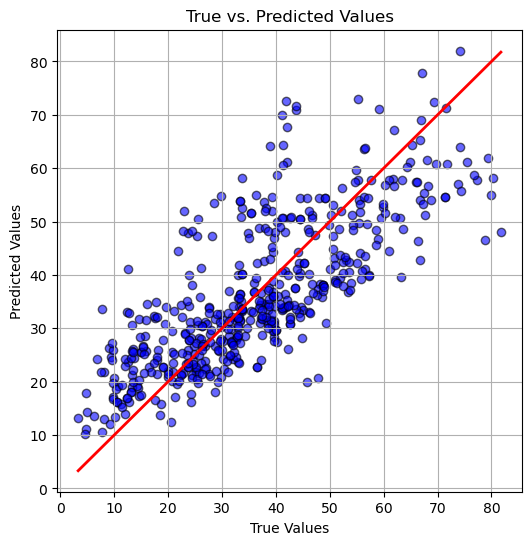

In [51]:
## Randomly partition the dataset into training and testing datasets, here each is half of the original
features_train, features_test, target_train, target_test = (
    train_test_split(concrete_df.iloc[:, 0:8], concrete_df["csMPa"], test_size=0.5))

# Train a linear regression model 
model = LinearRegression()
model.fit(features_train, target_train)

# Make predictions on the testing data
target_predict = model.predict(features_test)

# Determine mean-squared error and R^2 score
MSE = mean_squared_error(target_test, target_predict)
R2 = r2_score(target_test, target_predict)

# Output results
print("Mean Squared Error:", MSE)
print("R-squared:", R2)

# Scatter plot of true vs. predicted values
plt.figure(figsize=(6, 6))
plt.scatter(target_test, target_predict, color="blue", alpha=0.6, edgecolor='k')
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], color="red", linewidth=2)  # y=x line for reference
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.grid(True)
plt.show()

---
####  L9.5 Linear regression on a real dataset:

#### Try out different features in place of "cement" above. What happens to the R-squared score compared to the score for "cement"? Explain why this make senses with respect to the values in the correlation coefficient matrix.

#### Answer: The R-squared score of other features is lower than the R-squared score of cement since cemennt has the highest value for the correlation coefficient so it should have the highest R-squared as well.
---

Now, let's try using vector LLSE estimation to use more features to predict the compressive strength. Recall, from Video 7.3, that we can predict $Y$ from the vector $\underline{X}$ using the vector LLSE estimator $$\mathbb{E}[Y] + \mathbf{\Sigma}_{Y,X} \mathbf{\Sigma}_{X}^{-1} ( \underline{X} - \mathbb{E}[\underline{X}]) \ . $$ It turns out that the linear regression code above includes the capability of working with vectors, all we need to do is swap out `concrete_df[["cement"]]` with a dataframe that includes all but the last column "csMPa". (If we include the last column, we will get the uninteresting result that we can perfectly predict "csMPa" from itself.) Try this out below. This will give us a linear predictor of the form $$Y = \sum_{i=0}^7 a_i X_i  + b$$ where $X_i$ refers to the variable in the $i$th column. Notice that we have no way of visualizing the 9-dimensional dataset directly, but the "Predicted vs. True Values" scatter plot continues to be useful.

---
####  L9.6 Vector linear regression on a real dataset:

#### Swap out `concrete_df[["cement"]]` in the code above with a dataframe that includes all but the last column `csMPa`. Run the code and then report the resulting MSE and R-squared score, and comment on whether the full feature set results in a better linear estimator than a linear estimator based on a single column.

#### MSE: 111.36
#### R-squared: 0.592
#### Comment: The full feature set results in a better linear estimator than a linear estimator since it gets a lower MSE and higher value for R-squared.
---

What if we think a non-linear function will be a better fit, like the quadratic function we used earlier in the lab? All we need to do is create copies of our features, apply the desired non-linearities, and then train our linear regression on the augmented dataset. It turns out that `sklearn` includes code for doing this automatically. Below, we have modified the code to create polynomial features of degree $2$. As currently written, this will create a estimator of the form
$$\hat{Y} = a X^2 + b X  + c$$ where $X$ is the ``cement`` column. Try this out and see if the performance changes from above. Next, the lab problem below has you run the same pipeline on the full set of features, which will yield an estimator of the form
$$\hat{Y} = \sum_{i=0}^7 \sum_{j = 0}^7 a_{i,j} X_i + b$$ where $X_i$ refers to the variable in the $i$th column. 

Mean Squared Error: 88.39519364828196
R-squared: 0.6760506610403683


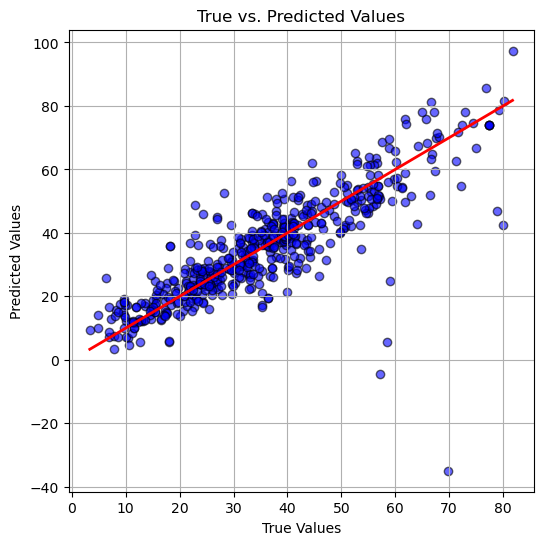

In [56]:
# Randomly partition the dataset into training and testing datasets, here each is half of the original
features_train, features_test, target_train, target_test = (
    train_test_split(concrete_df.iloc[:, 0:8], concrete_df["csMPa"], test_size=0.5))

# Train a linear regression model on polynomial features 
degree = 3  # Adjust the degree as needed
model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('linear_regression', LinearRegression())
])
model.fit(features_train, target_train)

# Make predictions on the testing data
target_predict = model.predict(features_test)

# Determine mean-squared error and R^2 score
MSE = mean_squared_error(target_test, target_predict)
R2 = r2_score(target_test, target_predict)

# Output results
print("Mean Squared Error:", MSE)
print("R-squared:", R2)

# Scatter plot of true vs. predicted values
plt.figure(figsize=(6, 6))
plt.scatter(target_test, target_predict, color="blue", alpha=0.6, edgecolor='k')
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], color="red", linewidth=2)  # y=x line for reference
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.grid(True)
plt.show()

---
####  L9.7 Augmenting features

#### (a) Run the code above. Does the R-squared score improve significantly from when used a linear estimator based on the ``cement`` column? 

#### R-squared: 0.238
#### Comment: The augmented feature doesn't improve the R-squared score from when using a linear estimator.

#### (b) Swap out `concrete_df[["cement"]]` in the code above with a dataframe that includes all but the last column `csMPa`. Run the code and then report the R-squared score, and comment on whether the augmented features improve the perfomance of the estimator.

#### R-squared: 0.787
#### Comment: The augmented features improve the performance of the estimator since the R-square score significantly increases.

#### (c) Finally, try increasing the `degree` to 3 (while working with the full dataset). You should observe that the R-squared score decreases. This is due to the fact that, if we make our estimator and augmented features too complicated, we will end up overfitting to our training data, and ultimately harming our real-world performance. 

#### R-squared: 0.676

---